
Autor: Sergio Barrera Cabodevila  

<table width="100%"><td style="font-size:22px;font-style:italic;text-align:right;">
El Algoritmo de Deustch-Jozsa   <br></td></table>
 
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\i}{{\color{blue} i}}$ 
$ \newcommand{\Hil}{{\mathbb H}}$
$ \newcommand{\bemat}{\begin{matrix}} $
$ \newcommand{\enmat}{\end{matrix}} $

## Introducción

El algoritmos de Deutsch-Jozsa surge como una generalización del algoritmo de Deustch para el caso en el que tenemos involucrados más de un estado binario. Al igual que en el caso del algoritmo de Deutsch, queremos determinar si una determinada función $f(x)$ es constante, es decir, siempre devuelve el mismo valor, o balanceada, si el valor que devuelve depende del argumento de $f$. El algoritmo de Deutsch se define para una función $f(x): \lbrace 0, 1 \rbrace \rightarrow \lbrace 0, 1 \rbrace$, y el de Deustch-Jozsa lo generaliza para $f(x): \lbrace 0, 1 \rbrace^n \rightarrow \lbrace 0, 1 \rbrace$. Es decir el argumento son $n$ valores binarios, que se pueden traducir en un número natural entre 0 y $2^{n} - 1$. El problema que queremos resolver se enuncia como:

> Sea la función $f(x): \lbrace 0, 1 \rbrace^n \rightarrow \lbrace 0, 1 \rbrace$. Queremos saber si $f(x)$ es una función constante, $f(x) = f(y) \;\; \forall x, y$, o balanceada, $f(x) = 0$ para la mitad del dominio de $f$ y $f(x) = 1$ para la otra mitad.

Para obtener una respuesta determinista a este problema, clasicamente se requiere evaluar la función $f$ un número $\frac{2^n}{2} + 1 = 2^{n-1} + 1$ de veces. La complejidad computacional de este problema crece exponencialmente con el número de variables binarias de las que depende el argumento de la función. Sin embargo, veremos como cuánticamente somos capaces de dar respuesta a este problema mediante una única evaluación de la función.

## El algoritmo

Consideremos dos registros cuánticos: uno formado por $n$ cúbits, que codifica el argumento de la función $f$, y otro con un único cúbit auxiliar. Sea $U_f: \ket{x, y} \rightarrow \ket{x, y \oplus f(x)}$ el operador que aplica la función $f$ al registro de $n$ cúbits y suma módulo dos el resultado al cúbit auxiliar. Los pasos del algoritmo son los siguientes:

0. Inicializamos el registro de $n$ cúbits en el estado $\ket{0}^n$ y el cúbit auxiliar en el $\ket{1}$.

\begin{equation}
\ket{x, y} = \ket{0}^{\otimes n} \otimes \ket{1}
\end{equation}

1. Aplicamos una puerta de Walsh-Hadamard a los $n+1$ cúbits, de forma que creamos un estado de superposición de todas las posibles configuraciones del sistema.

\begin{equation}
W_{n+1} \ket{x, y} = \frac{1}{\sqrt{2^n}} \sum_{x=0}^{2^n-1} \ket{x} \otimes \ket{-}
\end{equation}

2. Hacemos actuar la puerta que implementa el operador $U_f$.

\begin{equation}
U_f W_{n+1}\ket{x, y} = \frac{1}{\sqrt{2^n}} \sum_{x=0}^{2^n-1} \ket{x} \otimes \frac{1}{\sqrt{2}} (\ket{0 \oplus f(x)} - \ket{1 \oplus f(x)}) = \frac{1}{\sqrt{2^n}} \sum_{x=0}^{2^n-1} \ket{x} \otimes (-1)^{f(x)} \ket{-}
\end{equation}

3. Volvemos a aplicar la puerta de Walsh-Hadamard, pero ahora solo sobre los $n$ cúbits del registro que codifica el argumento de la función.
\begin{equation}
W_{n} U_f W_{n+1} \ket{x, y} = \frac{1}{\sqrt{2^n}} \sum_{x=0}^{2^n-1} (-1)^{f(x)} H^{\otimes n} \ket{x} \otimes \ket{-} \stackrel{\text{ * }}{=} \frac{1}{2^n} \sum_{x=0}^{2^n-1} \sum_{y=0}^{2^n-1} (-1)^{f(x) + x \cdot y} \ket{y} \otimes \ket{-} 
\end{equation}
Donde
\begin{equation}
x \cdot y \equiv x_0y_0 \oplus x_1y_2 \oplus \cdots \oplus x_{n-1}y_{n-1}
\end{equation}
siendo $x_0x_1\cdots x_{n-1}$ la representación binaria de $x$. 

#### Prueba

Queremos comprobar que 

\begin{equation}
H^{\otimes n} \ket{x} = \frac{1}{\sqrt{2^n}} \sum_{y=0}^{2^n-1} (-1)^{x \cdot y} \ket{y}
\end{equation}

Consideremos en primer lugar el caso de que $x$ represente un único cúbit. Es fácil comprobar que, en este caso podemos escribir:

\begin{equation}
H \ket{x} = \frac{1}{\sqrt{2}} \sum_{y=0}^1 (-1)^{xy} \ket{y}
\end{equation}

Para el caso general con $n$ cúbits, $\ket{x} = \ket{x_0x_1\cdots x_{n-1}}$, el resultado anterior se puede extender de forma trivial como:

\begin{equation}
H^{\otimes n} \ket{x} = \frac{1}{\sqrt{2^n}} \sum_{y=0}^{2^n - 1} (-1)^{x_0y_0 + x_1y_1 + \cdots + x_{n-1}y_{n-1}} \ket{y} = \frac{1}{\sqrt{2^n}} \sum_{y=0}^{2^n-1} (-1)^{x \cdot y} \ket{y} \otimes \ket{-} 
\end{equation}

Donde usamos que el resultado de cualquier potencia de $(-1)$ solo depende de la paridad del exponente, con lo cual podemos quedarnos con la suma módulo 2 tal y como se representa el $x \cdot y$.

4. Medimos el registro de $n$ cúbits. El resultado dependerá de si la función es constante o balanceada.

    - Si $f$ es <b>constante</b> medimos el estado $\ket{0}^{\otimes n}$ con probabilidad 1.
    - Si $f$ es <b>balanceada</b> medimos el estado $\ket{0}^{\otimes n}$ con probabilidad 0.

#### Prueba

- Si $f$ es <b>constante</b>:
\begin{equation}
\vert \bra{0}^{\otimes n} \bra{-} W_{n} U_f W_{n+1} \ket{x, y} \vert^2 = 
\Big\vert \frac{(-1)^{f(0)}}{2^n} \sum_{x=0}^{2^n-1} \sum_{y=0}^{2^n-1} (-1)^{x \cdot y} \braket{0}{y} \Big\vert^2 = 
\frac{1}{2^n} \Big\vert \sum_{x=0}^{2^n-1} (-1)^{x \cdot 0} \Big\vert^2 = 1
\end{equation}

- Si $f$ es <b>balanceada</b>:
\begin{equation}
\vert \bra{0}^{\otimes n} \bra{-} W_{n} U_f W_{n+1} \ket{x, y} \vert^2 = 
\frac{1}{2^n} \Big\vert \sum_{x=0}^{2^n-1} (-1)^{f(x) + x \cdot 0} \Big\vert^2 = 0
\end{equation}

## Definición del algoritmo 

En primer lugar, escribamos la estrutura del algoritmo en qiskit, sin concretar el oráculo que implementa la función $f$. Al final veremos como podemos definir el operador $U_f$.

In [1]:
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister

def Circuit(U, n):
    """ Constrúe el circuito que implementa el algoritmo de Deutsch-Jozsa para el oráculo U
    """
    
    qr = QuantumRegister(n+1)
    cr = ClassicalRegister(n+1)
    
    qc = QuantumCircuit(qr, cr, name='q')
    
    # Inicializacion
    qc.x(qr[-1])
    
    # Aplicamos la puerta de Walsh-Hadamard
    qc.h(qr)
    qc.barrier()
    
    # Implementacion del oraculo
    U(qc, qr)
    qc.barrier()
    
    # Volvemos a aplicar la puerta de Walsh-Hadamard
    qc.h(qr)
    qc.barrier()
    
    # Medimos todos los cúbits del primer registro
    qc.measure(qr[:-1], cr[:-1])
    
    return qc

## Definición del oráculo


Ahora tenemos que definir un oráculo que nos permita comprobar la validez del algoritmo. Necesitamos dos oráculos diferentes: uno para la función constante y otro para la balanceada.

- <b>Función constante</b>. Este caso es trivial, ya que es suficiente con tomar la identidad. Es el caso equivalente a que $f(x) = 0, \, \forall x$.

- <b>Función balanceada</b>. Hay multitud de ejemplos que permiten implementar un oráculo para una función balanceada. Uno de ellos consiste en tomar $n$ puertas CNOT, que toma como control cada uno de los $n$ cúbits del registro y como objetivo el cúbit auxiliar.

A continuación definimos estes dos operadores.

In [2]:
def U_constante(qc, qr):
    
    return qc


def U_balanceada(qc, qr):
    
    for i in range(len(qr)-1):
        qc.cx(qr[i], qr[-1])
    
    return qc

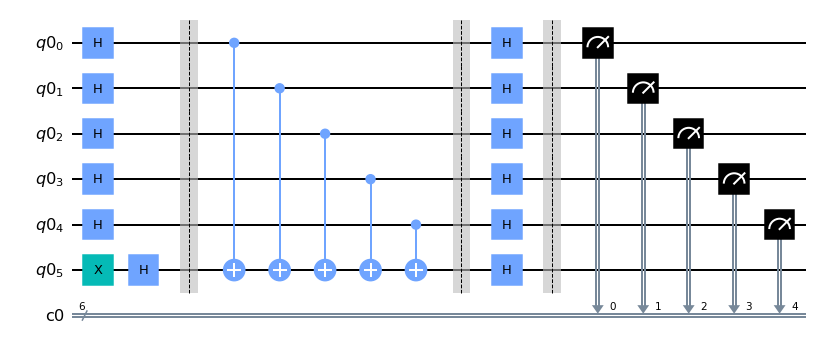

In [3]:
number_qubits = 5

qc = Circuit(U_balanceada, number_qubits)

qc.draw(output='mpl')

## Ejecución del circuíto en un simulador

Ahora que ya hemos definido nuestro circuíto podemos ejecutarlo en el simulador de IBM.

In [4]:
from qiskit import Aer, execute

Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

In [5]:
shots_exe = 1024 # Número de ejecuciones de la simulación

backend = Aer.get_backend('qasm_simulator')
job     = execute(qc, backend, shots = shots_exe)
result  = job.result()
counts  = result.get_counts()

Definimos una función que obtenga el número de cuentas para cada cúbit.

In [6]:
def get_counts(counts, number_qubits):
    
    list_aux = list(counts.items())
    res0 = sum([l[-1] for l in list_aux if l[0][1:] == '0'*number_qubits])
    res1 = shots_exe - res0
    c    = {'constante' : res0, 'balanceada' : res1}
    
    if c['constante'] > c['balanceada']:
        print('La función es constante con una probabilidad de %.3f' %(c['constante'] / (c['constante'] + c['balanceada'])))
    else:
        print('La función es balanceada con una probabilidad de %.3f' %(c['balanceada'] / (c['constante'] + c['balanceada'])))

    return c

In [7]:
count = get_counts(counts, number_qubits)

La función es balanceada con una probabilidad de 1.000


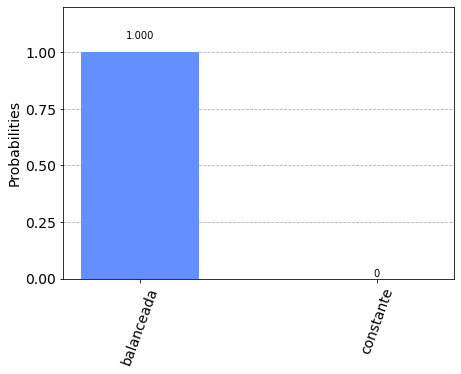

In [8]:
from qiskit.tools.visualization import plot_histogram

plot_histogram(count)

Veamos ahora lo que obtenemos para el caso de una función constante.

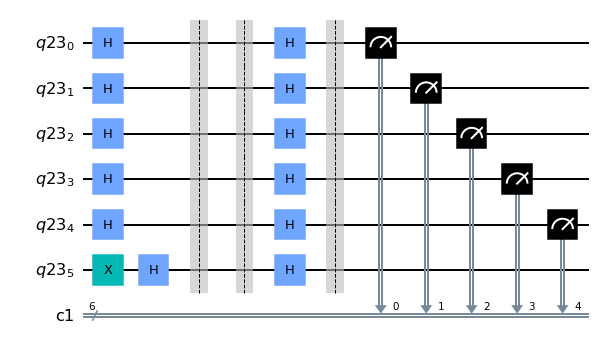

In [9]:
qc = Circuit(U_constante, number_qubits)

qc.draw(output='mpl')

In [10]:
backend = Aer.get_backend('qasm_simulator')
job     = execute(qc, backend, shots = 1024)
result  = job.result()
counts  = result.get_counts()

count = get_counts(counts, number_qubits)

La función es constante con una probabilidad de 1.000


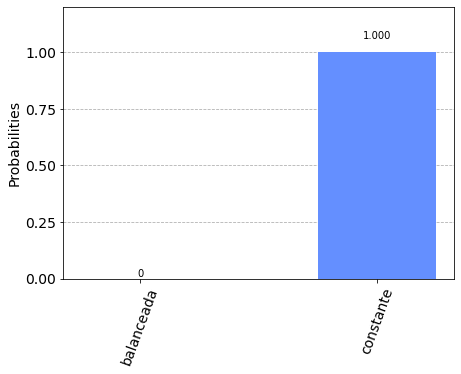

In [11]:
plot_histogram(count)